In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
ej_weight_path = r"C:\Users\USER\Documents\University\Data_Science_FP-main\Cleaned data output\cleaned_ZIP_level_EJ_Weighted.xls"
combined_ej_path = r"C:\Users\USER\Documents\University\Data_Science_FP-main\Cleaned data output\combined_EJ_LA_2018_2022.xls"
final_ej_path = r"C:\Users\USER\Documents\University\Data_Science_FP-main\Cleaned data output\final_avg_EJ_LA_2018_2022.xls"

ej_weight_df = pd.read_csv(ej_weight_path)
combined_ej_df = pd.read_csv(combined_ej_path)
final_ej_df = pd.read_csv(final_ej_path)

In [30]:
ej_weight_df

,ZIP,avg_traffic_pct_weighted,avg_diesel_pm_weighted,avg_cancer_risk_weighted,avg_resp_hazard_weighted,avg_ej_index_weighted
0,90001,73.045085,0.929436,44.828290,1.200063,0.724996
1,90002,82.047265,0.942855,44.056525,1.233882,0.742665
2,90003,89.026533,1.014228,44.795534,1.245435,0.734878
3,90004,83.429716,0.848405,46.020603,1.073375,0.506063
4,90005,73.108820,0.911116,47.856590,1.152458,0.592607
...,...,...,...,...,...,...
83,90087,74.524475,0.889733,44.909349,1.169537,0.718654
84,90089,99.034598,1.086022,44.468801,1.119576,0.644768
85,90091,85.383429,1.001603,51.339804,1.185568,0.593294
86,90093,92.480559,1.006887,48.624752,1.349650,0.442373


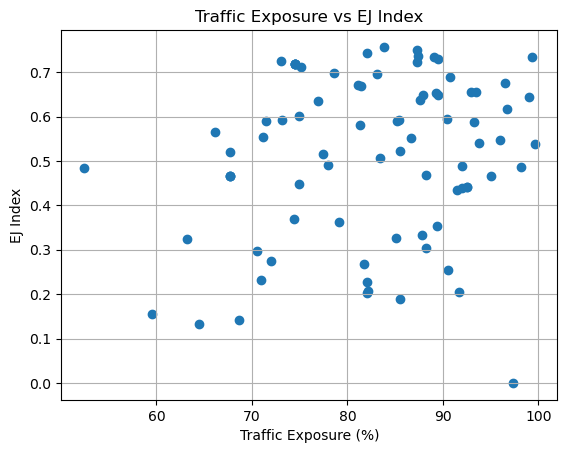

In [31]:
plt.scatter(ej_weight_df["avg_traffic_pct_weighted"], ej_weight_df["avg_ej_index_weighted"])

plt.xlabel("Traffic Exposure (%)")
plt.ylabel("EJ Index")
plt.title("Traffic Exposure vs EJ Index")
plt.grid(True)
plt.show()

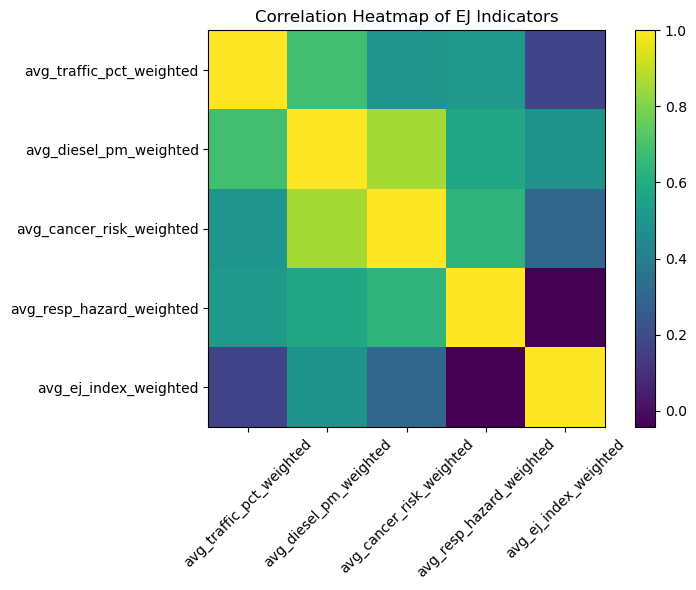

In [32]:
plt.figure(figsize=(8,6))
plt.imshow(ej_weight_df.iloc[:,1:].corr(), cmap="viridis")
plt.colorbar()
plt.xticks(range(len(ej_weight_df.columns[1:])), ej_weight_df.columns[1:], rotation=45)
plt.yticks(range(len(ej_weight_df.columns[1:])), ej_weight_df.columns[1:])
plt.title("Correlation Heatmap of EJ Indicators")
plt.tight_layout()
plt.show()

In [33]:
combined_ej_df

,ID,traffic_pct,diesel_pm,cancer_risk,resp_hazard,ej_index,YEAR
0,60379903000,2.623990,NaN,NaN,NaN,0.000000,2018
1,60372671003,94.523056,1.764619,62.265931,3.634336,0.380504,2018
2,60372671004,93.723937,1.764619,62.265931,3.634336,0.069038,2018
3,60372672001,97.172046,1.970032,62.690399,3.721783,0.240614,2018
4,60372672002,95.628985,1.970032,62.690399,3.721783,0.180047,2018
...,...,...,...,...,...,...,...
32286,60375322001,41.000000,0.589215,40.000000,0.500000,0.175261,2022
32287,60375322002,72.000000,0.589215,40.000000,0.500000,0.287303,2022
32288,60375322003,85.000000,0.589215,40.000000,0.500000,0.168956,2022
32289,60375320012,57.000000,0.615038,40.000000,0.600000,0.265255,2022


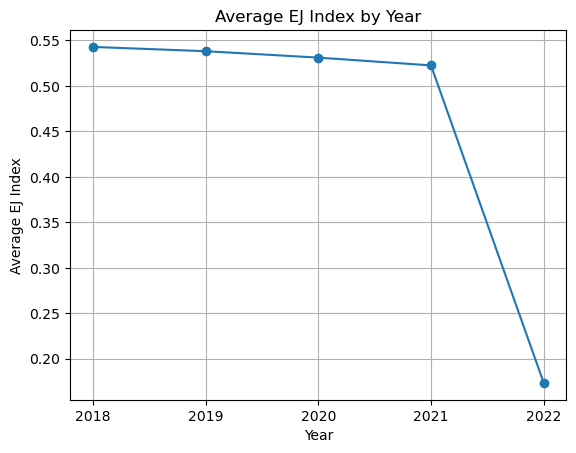

In [34]:
avg_ej_index = combined_ej_df.groupby("YEAR")["ej_index"].mean().reset_index()

plt.plot(avg_ej_index["YEAR"], avg_ej_index["ej_index"], marker="o")
plt.xticks(ticks=range(min(avg_ej_index["YEAR"]), max(avg_ej_index["YEAR"])+1, 1))
plt.xlabel("Year")
plt.ylabel("Average EJ Index")
plt.title("Average EJ Index by Year")
plt.grid(True)
plt.show()

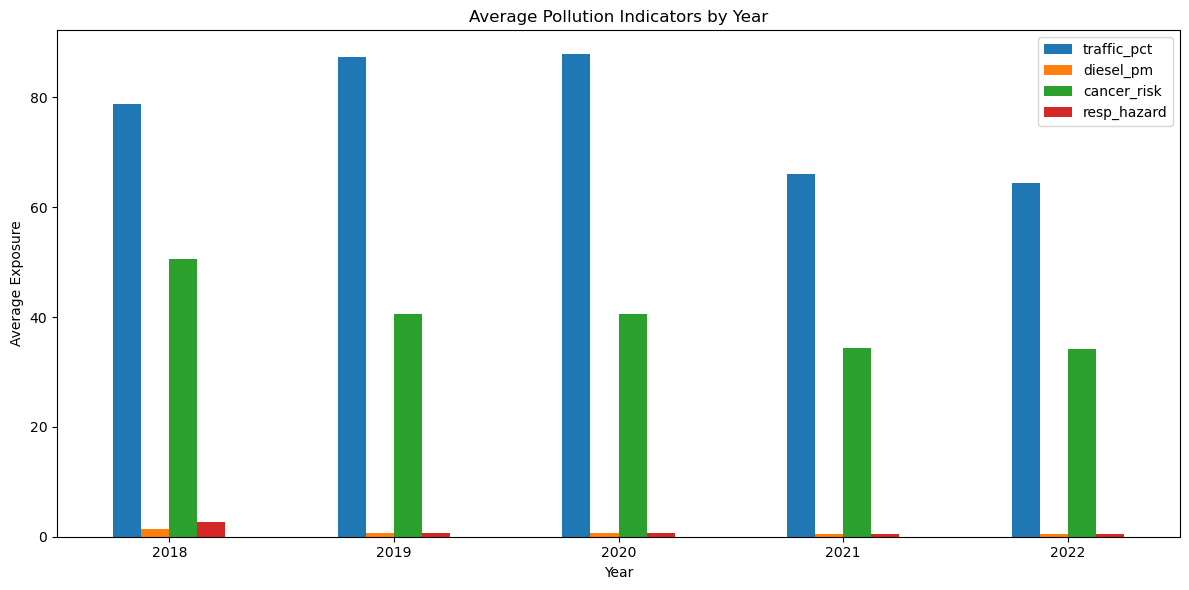

,traffic_pct,diesel_pm,cancer_risk,resp_hazard
YEAR,,,,
2018,78.719108,1.481052,50.649262,2.650055
2019,87.303139,0.677050,40.496155,0.607479
2020,87.825510,0.677050,40.496155,0.607479
2021,65.990796,0.459025,34.336297,0.459242
2022,64.467295,0.453767,34.196442,0.457503


In [35]:
pollution_year = combined_ej_df.groupby("YEAR")[["traffic_pct", "diesel_pm", "cancer_risk", "resp_hazard"]].mean()

pollution_year.plot(kind="bar", figsize=(12,6))
plt.title("Average Pollution Indicators by Year")
plt.ylabel("Average Exposure")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
pollution_year

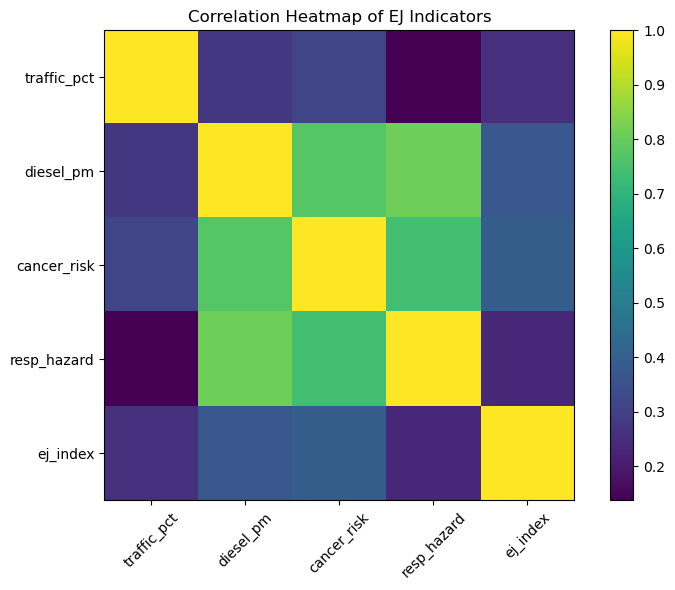

In [36]:
plt.figure(figsize=(8,6))
numeric_cols = ["traffic_pct","diesel_pm","cancer_risk","resp_hazard","ej_index"]
corr = combined_ej_df[numeric_cols].corr()

plt.imshow(corr, cmap="viridis")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Heatmap of EJ Indicators")
plt.tight_layout()
plt.show()

In [37]:
final_ej_df

,ID,avg_traffic_pct,avg_diesel_pm,avg_cancer_risk,avg_resp_hazard,avg_ej_index
0,60371011101,55.255659,0.302378,33.760106,0.604327,0.328672
1,60371011102,88.173400,0.302378,33.760106,0.604327,0.460834
2,60371011103,64.728930,0.302378,33.760106,0.604327,0.246257
3,60371011221,45.030485,0.280691,33.384834,0.594798,0.133610
4,60371011222,30.553203,0.280691,33.384834,0.594798,0.138240
...,...,...,...,...,...,...
7714,60379800381,23.000000,0.567836,40.000000,0.600000,0.028718
7715,60379800391,13.223120,0.718512,40.000000,0.883870,0.000000
7716,60379901000,3.446239,0.718512,40.000000,0.883870,0.000000
7717,60379902000,3.446239,0.718512,40.000000,0.883870,0.000000


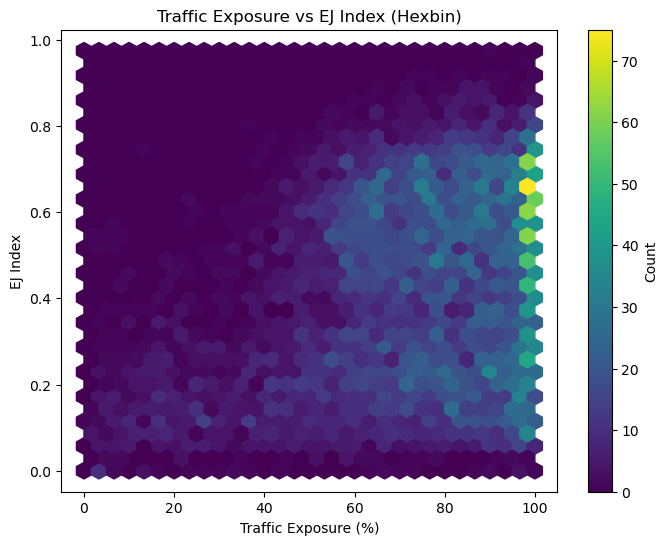

In [38]:
plt.figure(figsize=(8,6))
plt.hexbin(final_ej_df["avg_traffic_pct"], final_ej_df["avg_ej_index"], gridsize=30, cmap="viridis")
plt.colorbar(label="Count")
plt.xlabel("Traffic Exposure (%)")
plt.ylabel("EJ Index")
plt.title("Traffic Exposure vs EJ Index (Hexbin)")
plt.show()


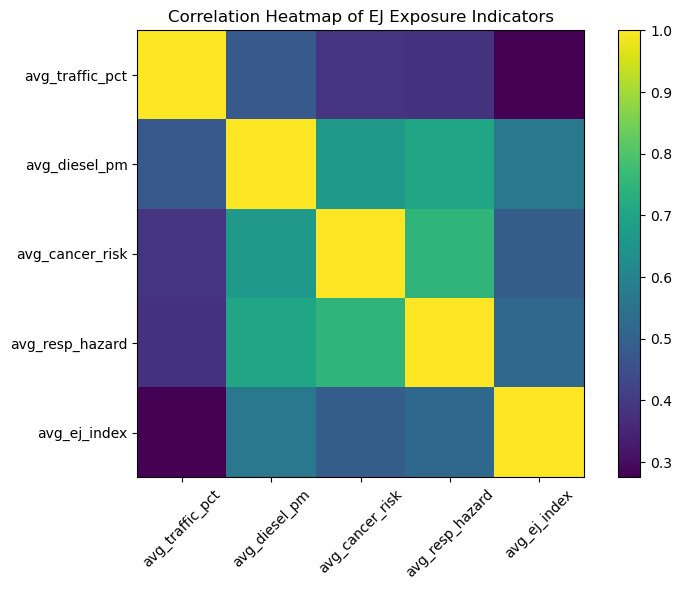

In [39]:
numeric_cols = ["avg_traffic_pct","avg_diesel_pm","avg_cancer_risk","avg_resp_hazard","avg_ej_index"]

plt.figure(figsize=(8,6))
corr = final_ej_df[numeric_cols].corr()

plt.imshow(corr, cmap="viridis")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Heatmap of EJ Exposure Indicators")
plt.tight_layout()
plt.show()


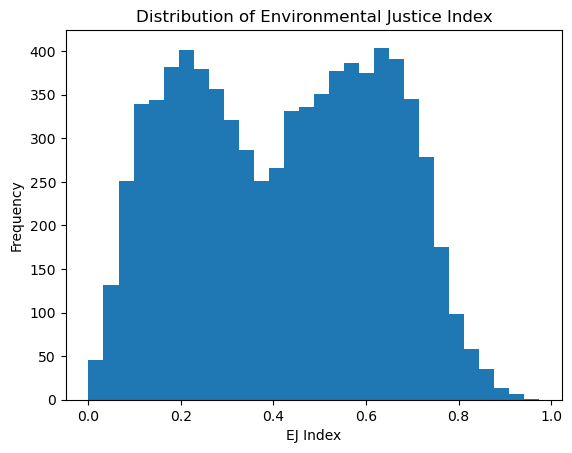

In [40]:
plt.hist(final_ej_df["avg_ej_index"], bins=30)
plt.xlabel("EJ Index")
plt.ylabel("Frequency")
plt.title("Distribution of Environmental Justice Index")
plt.show()

